In [2]:
import numpy as np
from numpy.random import default_rng

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [3]:
%matplotlib notebook

In [4]:
rng = default_rng()

In [5]:
def loguni(min_val, max_val, size):
    return np.exp((np.log(max_val) -np.log(min_val)) * rng.random(size)) + min_val

In [97]:
#"constantes" (acoplamientos y masas)
alpha = 1/137.035999084 #Constante de estructura fina
alpha_s = 0.1185 #Acoplamiento fuerte, a M_Z
m_e = 0.511 #Masa de electrón
m_mu = 105.6#Masa de muón
m_tau = 1776.86 #lo que dice
m_u = 1.288
m_d = 2.751
m_ch = 6.268e2
m_st = 5.432e1
m_t = 171.68e3
m_b = 2.854e3
m_p = 938.28
m_higgs = 125.10 #Masa del Higgs

In [98]:
# Produccion de fermiones por e+e- a leading order
#Electrón producción de fermione por e+ e-
def e_mu(th, s):
    E2 = s/4 #s = 4E^2
    A = m_mu**2/E2
    B = (E2-m_mu**2)/(E2-m_e**2)
    C = (m_e**2+m_mu**2)/E2
    return (alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def e_tau(th, s):
    E2 = s/4 #s = 4E^2
    A = m_tau**2/E2
    B = (E2-m_tau**2)/(E2-m_e**2)
    C = (m_e**2+m_tau**2)/E2
    return (alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def e_u(th, s):
    E2 = s/4 #s = 4E^2
    A = m_u**2/E2
    B = (E2-m_u**2)/(E2-m_e**2)
    C = (m_e**2+m_u**2)/E2
    return 3*(2/3)**2*(alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def e_d(th, s):
    E2 = s/4 #s = 4E^2
    A = m_d**2/E2
    B = (E2-m_d**2)/(E2-m_e**2)
    C = (m_e**2+m_d**2)/E2
    return 3*(1/3)**2*(alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def e_ch(th, s):
    E2 = s/4 #s = 4E^2
    A = m_ch**2/E2
    B = (E2-m_ch**2)/(E2-m_e**2)
    C = (m_e**2+m_ch**2)/E2
    return 3*(2/3)**2*(alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def e_st(th, s):
    E2 = s/4 #s = 4E^2
    A = m_st**2/E2
    B = (E2-m_st**2)/(E2-m_e**2)
    C = (m_e**2+m_st**2)/E2
    return 3*(1/3)**2*(alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def mu_tau(th, s):
    E2 = s/4 #s = 4E^2
    A = m_tau**2/E2
    B = (E2-m_tau**2)/(E2-m_mu**2)
    C = (m_mu**2+m_tau**2)/E2
    return (alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def e_t(th, s):
    E2 = s/4 #s = 4E^2
    A = m_t**2/E2
    B = (E2-m_t**2)/(E2-m_e**2)
    C = (m_e**2+m_t**2)/E2
    return 3*(2/3)**2*(alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)

def e_b(th, s):
    E2 = s/4 #s = 4E^2
    A = m_b**2/E2
    B = (E2-m_b**2)/(E2-m_e**2)
    C = (m_e**2+m_b**2)/E2
    return 3*(1/3)**2*(alpha/(16*E2))*np.sqrt(B)*(1+C+(1-A)*np.cos(th)**2)


In [151]:
#Otros procesos de QED a leading order
#https://www.imperial.ac.uk/media/imperial-college/research-centres-and-groups/theoretical-physics/msc/current/qft/handouts/qftcrossection.pdf
def Yukawa(th, s): # ESTE ES DE DOS CUERPOS a uno
    E2 = s/4 #s = 4E^2
    m = m_higgs #Ponemos masa del higgs como la del bosón de interacción
    M = m_e #Masa del electrón como la del par de partículas que interactúan
    g = 64*np.pi**2*alpha #Que constante de acoplamiento ponemos???
    p2 = E2-M**2
    A = 2*p2*(1+np.cos(th))+m**2
    B = 2*p2*(1-np.cos(th))+m**2
    return g**4/(128*np.pi**2*np.sqrt(E2))*(1/A+1/B)

#https://edu.itp.phys.ethz.ch/hs12/qft1/Chapter09.pdf (para los dos siguientes)
#Electrón con electrón (proceso de segundo orden)
def e_e(th, s):
    ep = 1e-8 #elimina polo no fisico
    E2 = s/4 #s = 4E^2
    m = m_e
    p2 = E2-m**2
    A = (4*p2+2*m**2)**2/(p2**2*np.sin(th)**4 + ep)
    B = (8*p2**2+12*m**2*p2+3*m**4)/(p2**2*np.sin(th)**4 + ep)
    return (alpha**2/(4*E2))*(A-B+1)

#Electrón con positrón (Rutherford)
def e_p(th, s):
    #Este directo con las variables de Mandelstam en el CM
    m1 = m_e
    m2 = m_e
    m3 = m_p
    m4 = m_p
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*np.cos(th)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    A = ((s-u)/t+(t-u)/s)**2
    B = 16*m1**2*(5*m1**2-2*u)/(s*t)
    return (alpha**2/(4*s))*(A+B)


In [230]:
#procesos de QCD: E > Lambda_QCD ~ 300MeV de https://pdg.lbl.gov/rev2019/2019/reviews/rpp2019-rev-cross-section-formulae.pdf
#quark anti- quark a quark anti-quark, con quarks distintos (solo algunos)
def uub_ddb(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_u
    m3 = m_d
    m4 = m_d
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*(t**2+u**2)/s**2

def ddb_uub(th,s):
    ep = 1e-8
    m1 = m_d
    m2 = m_d
    m3 = m_u
    m4 = m_u
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*(t**2+u**2)/s**2

def ud_ud(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_d
    m3 = m_u
    m4 = m_d
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*(s**2+u**2)/t**2

def uub_uub(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_u
    m3 = m_u
    m4 = m_u
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*((t**2+u**2)/s**2+(s**2+u**2)/t**2 - 2*u**2/(3*s*t))

def ddb_ddb(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_u
    m3 = m_u
    m4 = m_u
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*((t**2+u**2)/s**2+(s**2+u**2)/t**2 - 2*u**2/(3*s*t))

def uu_uu(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_u
    m3 = m_u
    m4 = m_u
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*((t**2+s**2)/u**2+(s**2+u**2)/t**2 - 2*s**2/(3*u*t))

def dd_dd(th,s):
    ep = 1e-8
    m1 = m_d
    m2 = m_d
    m3 = m_d
    m4 = m_d
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*((t**2+s**2)/u**2+(s**2+u**2)/t**2 - 2*s**2/(3*u*t))



In [246]:
#procesos involucrando bosones de norma como estados asintoticos
def gl_gl(th, s):
    #Este directo con las variables de Mandelstam en el CM
    ep = 1e-8
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return (9*alpha_s**2/(8*s))*(A)

# e+ e- -> dos fotones
def ee_gaga(th, s):
    ep = 1e-8
    m1 = m_e
    m2 = m_e
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha**2/(2*s) * (u**2 + t**2)/(t*u)

def uub_glgl(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_u
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return 8*alpha_s**2/(27*s)*(t**2 + u**2)*(1/(t*u)-9/(4*s**2))

def ddb_glgl(th,s):
    ep = 1e-8
    m1 = m_d
    m2 = m_d
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return 8*alpha_s**2/(27*s)*(t**2 + u**2)*(1/(t*u)-9/(4*s**2))

def ugl_ugl(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_u
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*(s**2 + u**2)*(-1/(s*u)+9/(4*t**2))

def dgl_dgl(th,s):
    ep = 1e-8
    m1 = m_d
    m2 = m_d
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(9*s)*(s**2 + u**2)*(-1/(s*u)+9/(4*t**2))

def glgl_uub(th,s):
    ep = 1e-8
    m1 = m_u
    m2 = m_u
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(24*s)*(t**2 + u**2)*(1/(t*u)-9/(4*s**2))

def glgl_ddb(th,s):
    ep = 1e-8
    m1 = m_d
    m2 = m_d
    m3 = 0
    m4 = 0
    p1 = np.sqrt((s-(m1-m2)**2)*(s-(m1+m2)**2))/(2*np.sqrt(s))
    p3 = np.sqrt((s-(m3-m4)**2)*(s-(m3+m4)**2))/(2*np.sqrt(s))
    E1 = np.sqrt(m1**2 + p1**2)
    E3 = np.sqrt(m3**2 + p3**2)
    t = m1**2 + m3**2 - 2*E1*E3 + 2*p1*p3*(np.cos(th) + ep)
    u = m1**2 + m2**2 + m3**2 + m4**2 - s - t
    return alpha_s**2/(24*s)*(t**2 + u**2)*(1/(t*u)-9/(4*s**2))


In [247]:
def data_gen(f, th0, l_s, s_min, s_max, sig_oom, char):
    l_th = len(th0)
    
    ph = np.sort(loguni(s_min, s_max, 2))
    
    ls_min = np.log(ph[0])
    ls_max = np.log(ph[1])
    
    s0 = np.logspace(ls_min, ls_max, l_s, base = np.e)
    
    ls_mean = np.log(np.mean(s0))
    ls_median = np.log(np.median(s0))
    ls_std = np.log(np.std(s0))
    
    th, s = np.meshgrid(th0, s0)
    
    f_val = f(th, s) 
    
    fs_min = np.log(f_val.min())
    fs_max = np.log(f_val.max())    
    fs_mean = np.log(np.mean(f_val))
    fs_median = np.log(np.median(f_val))
    fs_std = np.log(np.std(f_val))
    
    vec = np.array([ls_min, ls_max, ls_mean, ls_median, ls_std, fs_min, fs_max, fs_mean, fs_median, fs_std])
    
    dsigma = np.log(f_val*(1 + rng.normal(0, sig_oom, size=(l_th, l_s))))
    #dsigma = f_val*(1 + rng.normal(0, sig_oom, size=(l_th, l_s)))
    
    return np.array([[dsigma, vec],[char]])

In [248]:
l = 32
th0 = np.linspace(-np.pi, np.pi, l)

vro = data_gen(glgl_uub, th0, l, (2*m_d)**2, 1e16, 0.05, 1)
vro[0][0]

array([[-12.11794813, -26.63634052, -28.1568315 , ..., -28.18176559,
        -26.69303172, -12.19624563],
       [-12.3816531 , -26.83680832, -28.37479029, ..., -28.33241897,
        -26.89842702, -12.24267625],
       [-12.52454613, -27.01443315, -28.59198884, ..., -28.54406708,
        -26.96732838, -12.58240734],
       ...,
       [-17.43704726, -32.07255848, -33.57362529, ..., -33.59282045,
        -32.0179849 , -17.47518004],
       [-17.64867836, -32.16059283, -33.79550918, ..., -33.78989359,
        -32.26697386, -17.7029032 ],
       [-17.88560376, -32.39866709, -33.92625486, ..., -33.90269879,
        -32.43490522, -17.8629084 ]])

In [249]:
aaa = vro[0][0]

print(np.mean(aaa),np.std(aaa))

#aaa = (aaa - np.mean(aaa))/(np.std(aaa) + 1e-8)

aaa

-31.207094271250156 4.832670564381459


array([[-12.11794813, -26.63634052, -28.1568315 , ..., -28.18176559,
        -26.69303172, -12.19624563],
       [-12.3816531 , -26.83680832, -28.37479029, ..., -28.33241897,
        -26.89842702, -12.24267625],
       [-12.52454613, -27.01443315, -28.59198884, ..., -28.54406708,
        -26.96732838, -12.58240734],
       ...,
       [-17.43704726, -32.07255848, -33.57362529, ..., -33.59282045,
        -32.0179849 , -17.47518004],
       [-17.64867836, -32.16059283, -33.79550918, ..., -33.78989359,
        -32.26697386, -17.7029032 ],
       [-17.88560376, -32.39866709, -33.92625486, ..., -33.90269879,
        -32.43490522, -17.8629084 ]])

<IPython.core.display.Javascript object>


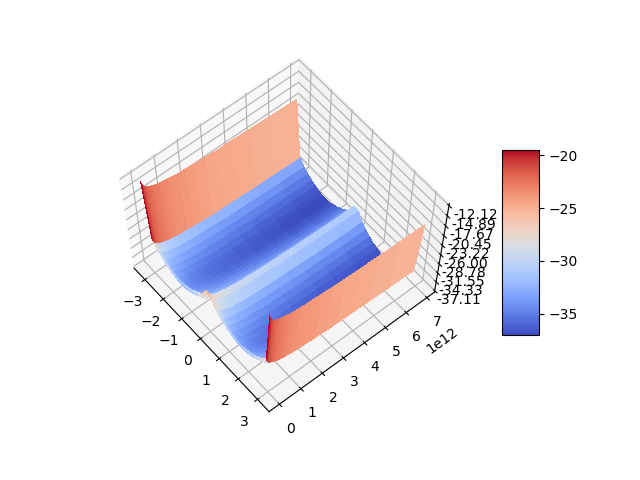

In [250]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
th, s = np.meshgrid(th0, np.logspace(vro[0][1][0], vro[0][1][1], l, base = np.e))
val = aaa

# Plot the surface.
surf = ax.plot_surface(th, s, val, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(val.min(), val.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

<IPython.core.display.Javascript object>


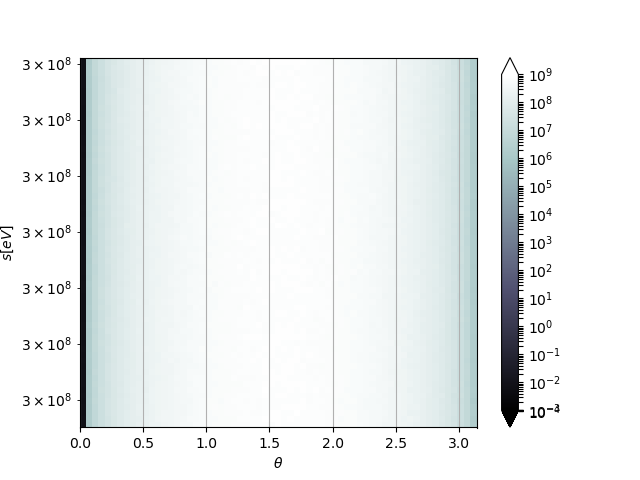

In [58]:
# NO SIRVE POR AHORA
Ordmin = np.floor(np.log10(np.abs(np.min(np.exp(val))))) #Orden de magnitud mínimo
Ordmax = np.ceil(np.log10(np.abs(np.max(np.exp(val))))) #Orden de magnitud máximo
#RECORDAR QUE LOS VALORES EN (-linthresh,linthresh) SON EN ESCALA LINEAL
norm = cm.colors.SymLogNorm(linthresh=1E-27, linscale=0.3,vmin=1*10**Ordmin, vmax=1*10**Ordmax, base=10) #colores en escala logarítmica

fig = plt.figure()
ax = fig.add_subplot(111)
cset = ax.pcolormesh(th, s, np.exp(val), norm=norm, cmap='bone', shading='auto')
fig.colorbar(cset,extend='both')

plt.yscale('log')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$s[eV]$')
plt.grid()
plt.show()